In [2]:
import zipfile

test_set=zipfile.ZipFile('test_set.zip')
training_set=zipfile.ZipFile('training_set.zip')
test_set.extractall()
training_set.extractall()

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import datasets, layers, models


height=64 #이미지 크기 64*64
wide=64

num_of_answer=2 # 정답의 갯수 (개, 고양이에 대한 CNN 이므로 두 가지)

In [4]:
def load_data():

    test_list=test_set.namelist() # testset의 데이터 전처리
    test_count=0

    for file in test_list:
        if 'jpg' in file:
            test_count+=1

    test_x=np.zeros((test_count,height,wide,3))
    test_y=np.zeros((test_count,num_of_answer))

    test_count=-1
    for test in test_list:
        if 'jpg' in test:
            test_count+=1 
            test=test.replace("\\",'/',10)
            test_img=cv2.imread('C:/Users/aid08/Desktop/reinf/Proj_Dog_Or_Cat/'+ test)
            test_img=cv2.resize(test_img, dsize=(height,wide))
            test_x[test_count]=test_img
            if 'cat' in test:
                test_y[test_count][0]=1
            elif 'dog' in test:
                test_y[test_count][1]=1
    
    training_list=training_set.namelist()     
    train_count=0

    for training in training_list: 
        if 'jpg' in training:
            train_count+=1

    train_x=np.zeros((train_count,height,wide,3))
    train_y=np.zeros((train_count,num_of_answer))

    train_count=-1
    for train in training_list:
        if 'jpg' in train:
            train_count+=1
            train=train.replace("\\",'/',10)
            train_img=cv2.imread('C:/Users/aid08/Desktop/reinf/Proj_Dog_Or_Cat/'+ train)
            train_img=cv2.resize(train_img, dsize=(height,wide))
            train_x[train_count]=train_img
            if 'cat' in train:
                train_y[train_count][0]=1
            elif 'dog' in train:
                train_y[train_count][1]=1

    return [train_x/255, train_y, test_x/255, test_y]


train_X, train_Y, test_X, test_Y = load_data()

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y))


Epoch 1/10
251/251 [==============================] - 15s 55ms/step - loss: 0.6841 - accuracy: 0.5474 - val_loss: 0.6568 - val_accuracy: 0.6268
Epoch 2/10
251/251 [==============================] - 14s 55ms/step - loss: 0.6116 - accuracy: 0.6626 - val_loss: 0.5629 - val_accuracy: 0.7158
Epoch 3/10
251/251 [==============================] - 14s 57ms/step - loss: 0.5479 - accuracy: 0.7224 - val_loss: 0.5554 - val_accuracy: 0.7168
Epoch 4/10
251/251 [==============================] - 14s 56ms/step - loss: 0.5021 - accuracy: 0.7552 - val_loss: 0.5150 - val_accuracy: 0.7464
Epoch 5/10
251/251 [==============================] - 14s 56ms/step - loss: 0.4598 - accuracy: 0.7819 - val_loss: 0.4839 - val_accuracy: 0.7726
Epoch 6/10
251/251 [==============================] - 15s 58ms/step - loss: 0.4230 - accuracy: 0.8032 - val_loss: 0.4654 - val_accuracy: 0.7840
Epoch 7/10
251/251 [==============================] - 15s 58ms/step - loss: 0.3865 - accuracy: 0.8262 - val_loss: 0.4763 - val_accuracy:

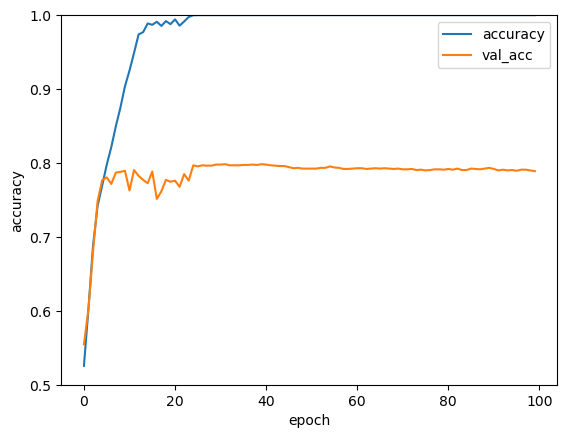

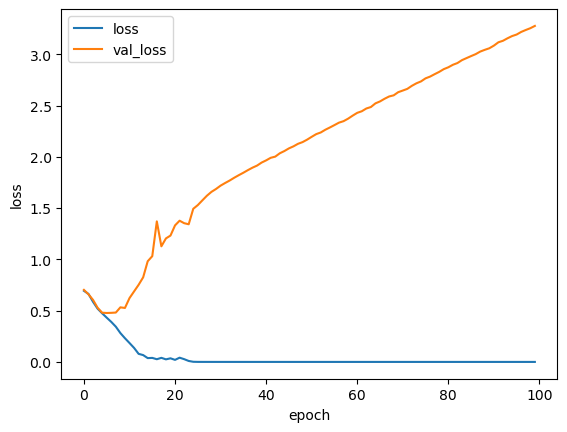

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1.0])
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model.save("model.h5")
